### **Import libraries**

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

### **Preprocess results**

Extract key terms and store them in a Dataframe.

In [3]:
with open(file="../.deepeval/.deepeval-cache.json", mode="r", encoding="utf-8") as file:
  eval_results = json.load(file)

with open(file="../data/eval/qa_dataset.json", mode="r", encoding="utf-8") as file:
  qa_dataset = json.load(file)

dict_data_list = []
for key, val in eval_results["test_cases_lookup_map"].items():
  dict_data = dict()

  key_dict = json.loads(key)
  dict_data["user_input"] = key_dict["input"]

  metric_name_mapping = {
    0: "contextual_precision",
    1: "contextual_recall",
    2: "faithfulness",
    3: "answer_relevancy"
  }
  for i, data in enumerate(val["cached_metrics_data"]):
    dict_data[f"{metric_name_mapping[i]}_score"] = data["metric_data"]["score"]
    dict_data[f"{metric_name_mapping[i]}_reason"] = data["metric_data"]["reason"]
  
  dict_data_list.append(dict_data)

eval_result_df = pd.DataFrame(data=dict_data_list)
qa_dataset_df = pd.DataFrame(data=qa_dataset)
df = qa_dataset_df.merge(right=eval_result_df, how="inner", left_on="question", right_on="user_input")
df = df.drop(columns="user_input")
df.head(n=3)

,question,answer,question_type,contextual_precision_score,contextual_precision_reason,contextual_recall_score,contextual_recall_reason,faithfulness_score,faithfulness_reason,answer_relevancy_score,answer_relevancy_reason
0,Halueval được tạo ra để làm gì?,Halueval là một chuẩn đánh giá quy mô lớn về h...,factual,1.0,The score is 1.0 because all nodes relevant to...,1.0,The score is 1.00 because the 3rd node in retr...,1.0,The score is 1.00 because there are no contrad...,1.0,The score is 1.00 because there were no irrele...
1,Có bao nhiêu nhà nghiên cứu đã tham gia vào cô...,Có sáu nhà nghiên cứu đã tham gia vào công trì...,inferential,0.0,The score is 0.0 because all the nodes in the ...,1.0,The score is 1.00 because the node(s) in retri...,1.0,The faithfulness score is 1.00 because there a...,1.0,The score is 1.00 because the response perfect...
2,Các mô hình ngôn ngữ lớn như ChatGPT có xu hướ...,Các mô hình ngôn ngữ lớn như ChatGPT có xu hướ...,factual,1.0,The score is 1.0 because all retrieval context...,1.0,The score is 1.00 because the 1st node in retr...,1.0,The faithfulness score is 1.00 because there a...,1.0,The score is 1.00 because there were no irrele...


### **Analyze results**

Visualize each metric score using histogram.

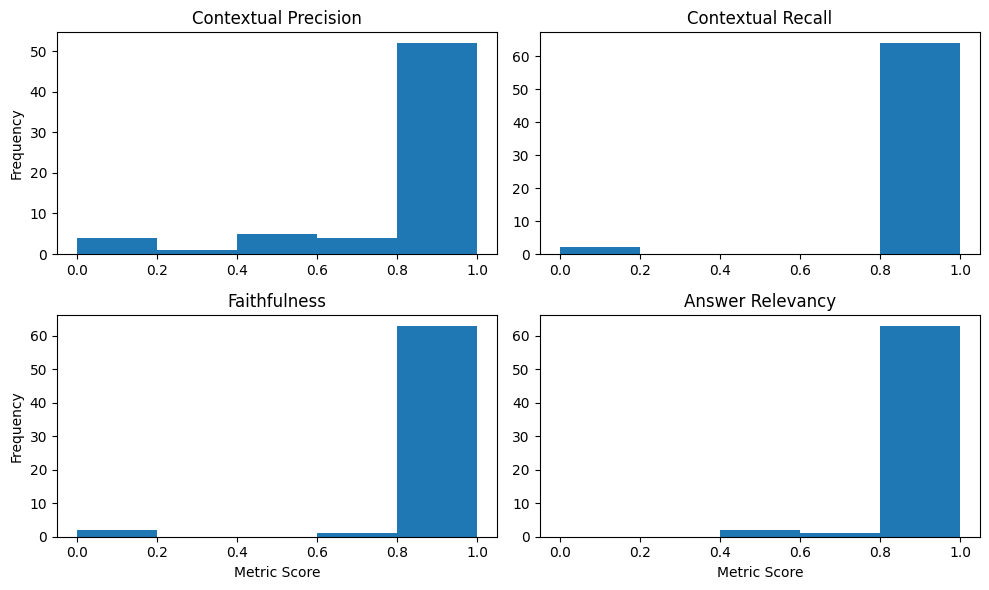

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

title_mapping = {
  0: "Contextual Precision",
  1: "Contextual Recall",
  2: "Faithfulness",
  3: "Answer Relevancy"
}

for i in range(len(axes)):
  axes[i].hist(df[f"{metric_name_mapping[i]}_score"], bins=5, range=(0, 1))
  axes[i].set_title(title_mapping[i])
  if i == 2 or i == 3:
    axes[i].set_xlabel("Metric Score")

axes[0].set_ylabel("Frequency")
axes[2].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

Visualize the average score of each metric.

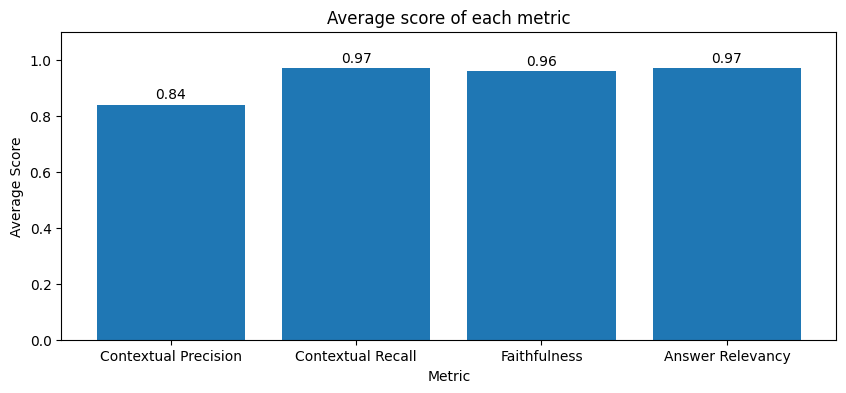

In [27]:
mean_scores = []
for i in range(4):
  mean_score = round(df[f"{metric_name_mapping[i]}_score"].mean(), 2)
  mean_scores.append(mean_score)

plt.figure(figsize=(10, 4))
bars = plt.bar(x=[title_mapping[i] for i in range(4)], height=mean_scores)
plt.xlabel("Metric")
plt.ylabel("Average Score")
plt.title("Average score of each metric")

# Add the value on top of each bar
for bar in bars:
  height = bar.get_height()
  plt.text(
    bar.get_x() + bar.get_width() / 2,  # x position
    height + 0.01,                      # y position (slightly above the bar)
    f"{height:.2f}",                    # formatted score
    ha='center', va='bottom', fontsize=10
  )

plt.ylim(0, 1.1)
plt.show()